In [21]:
from pytorch_lightning.callbacks import ModelCheckpoint

from pytorch_lightning import Trainer

from config import Config, LRS2Config
from data.lrs3 import LRSDataModule
from model.sign_translator import SignTranslator

config = LRS2Config
config.dataset_dir = "D:\\lrs2\\mvlrs_v1"
config.batch_size = 3
data = LRSDataModule(config)
# model = SignTranslator(config).load_from_checkpoint("checkpoints/epoch=0-step=29999.ckpt", config=config)
model = SignTranslator(config)

load weights
loaded params/tot params:151/151
miss matched params: []


In [22]:

data.setup()
train_loader = data.train_dataloader()
test_loader = data.test_dataloader()

Crawling data.
Completed crawling in: 0:00:00.502519


In [23]:
for thing in test_loader:
    frames, lengths, labels, labels_id = thing
    break

In [24]:
from model.pretrain_videocnn import transform_frames_for_pretrain
frames_tr = transform_frames_for_pretrain(frames)

In [25]:
output_logits, output_mask, _, _ = model(frames=frames_tr,
                                         lengths=lengths,
                                         labels=None,
                                         labels_id=None)

In [12]:
import torch

In [26]:
# greedy_ids = torch.argsort(output_logits, dim=2).numpy()[..., ::-1]
greedy_ids = torch.argmax(output_logits, dim=2)

In [28]:
for i in range(5):
    print("Output: " + tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(greedy_ids[1:, i])))

Output:  Attributiongement Attribution legend handshakeyright handshake Attributionyrightzmanierrez legend handshake Attributionyright Attributionyrightierrezyrightzmanyright Attributionyrightyrightierrezyrightyright Attributionarthedyright Attributionyright Attributionyright Attributionzman Attributionyrightyright Attribution Attribution Attribution Attributionzman
Output: 【yrightipalyrightipalyrightyrightipalipalyrightyrightyrightyrightternalyrightyrightcessioncessionノyrightyrightyrightノyrightyrightyrightyrightyrightyrightノyrightternalternalierrezternalceivedternalyrightyrightyrightyrightyrightceivedyright
Output: ipalcessioncessionyrightyrightipalipalyrightipalyrightyrighticioyrightavieryrightyrightyrightyright Attributionyright Attributionyright Attributionyrightyrightyrightyrightyrightyrightyrightyrightyrightyrightyrightyrightyright Attributionyrightyright Attributionyright Attributionyrightngth


IndexError: index 3 is out of bounds for dimension 1 with size 3

In [14]:
tokenizer = model.decoder.language_model.tokenizer

In [60]:
labels

['AND FOR ME THE SURPRISE WAS',
 "THEY'RE MOVING AROUND",
 'AND WE WERE RIGHT',
 'AND THE NEXT DAY',
 "WHEN THERE ISN'T MUCH ELSE IN THE GARDEN"]

In [62]:
for i in range(5):
    print("Output: " + tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(greedy_ids[1:, i])))

Output: I'' THE TO THE THEING THEING THEING THE THEING THEING                           
Output: I'' THE THE THE THEING TOINGING THEING TOINGING THEING                          
Output: I' THE THE THEING THEING THEING THEING THE THEING THE                            
Output: I'' THE THEING' THEING THEING THEINGING THE ING                           
Output: I'' THE THEINGING THEINGING THEINGING THEINGING                            


In [23]:
frames.shape

torch.Size([1, 62, 160, 160, 3])

In [32]:
import cv2
size = (160, 160)
fps = 25
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for frame in frames[0].numpy():
    out.write(frame[..., ::-1])
out.release()

In [25]:
out.release()

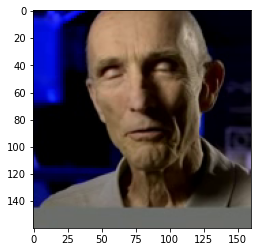

In [30]:
import matplotlib.pyplot as plt
plt.imshow(frames[0][15])